In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
Data = pd.read_csv('happiness_score_dataset.csv')
Data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
Data.shape

(158, 12)

In [5]:
Data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
Data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
Data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [9]:
cols = Data.columns
num_cols = Data._get_numeric_data().columns

catagorical_data =list(set(cols) - set(num_cols))
catagorical_data

['Country', 'Region']

In [11]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()


for i in catagorical_data:
    Data[i]=LE.fit_transform(Data[i])

In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    int32  
 1   Region                         158 non-null    int32  
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int32(2), int64(1)
memory usage: 13

In [14]:
Data.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [15]:
Data.drop(["Happiness Rank","Country"], axis= 1, inplace = True)

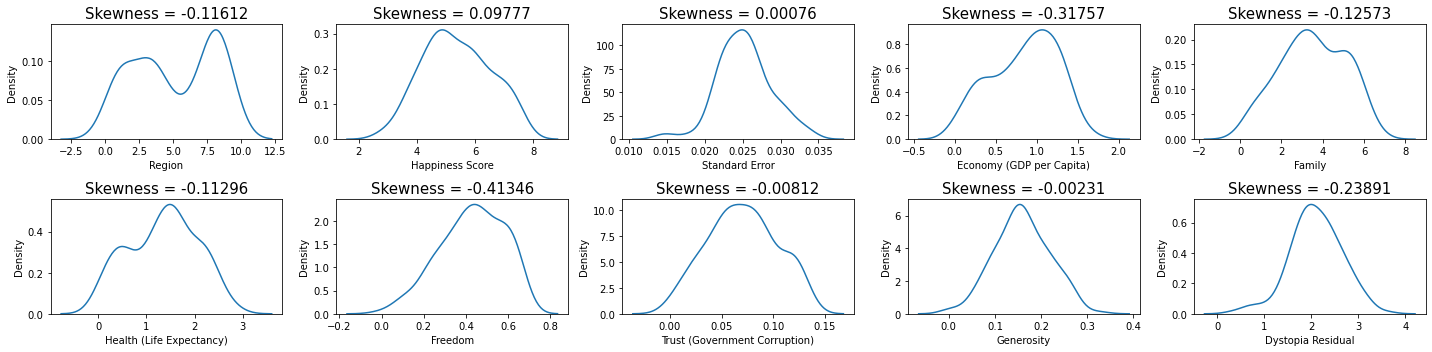

In [36]:
plt.figure(figsize=(20,5))
collist = Data.columns.values
for i in range (0, len(collist)):
    plt.subplot(2,5,i+1)         
    sns.kdeplot(Data[collist[i]])
    plt.title(f"Skewness = {round(Data[collist[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

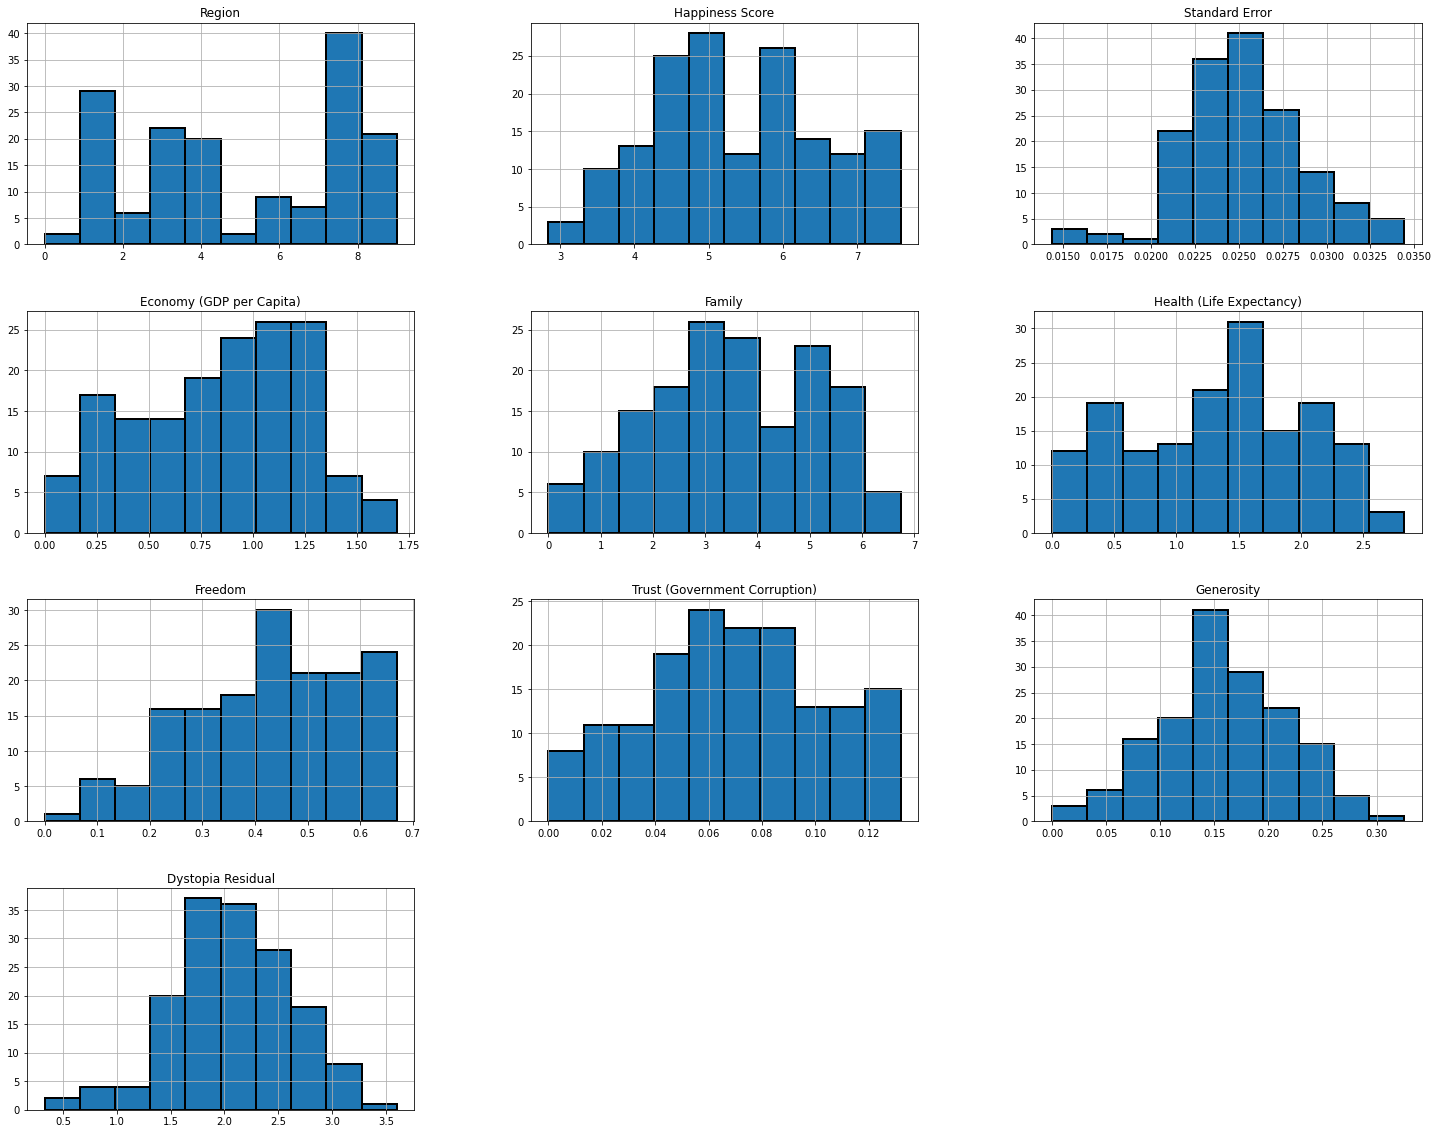

In [37]:
Data.hist(edgecolor="black",linewidth= 2, figsize= (25,20));

In [26]:
skewness=[]
for i in Data.skew().values:
    skewness.append(i)
    
Data_skewness= pd.DataFrame({"Feature_names": collist,"Skew": skewness})
Data_skewness= Data_skewness.sort_values(by="Skew", ascending=False, ignore_index= True)


skew_postive_row= []
skew_negative_row=[]
for index, row in Data_skewness.iterrows():
    if row['Skew']>0.49:
        skew_postive_row.append(row['Feature_names'])
    elif row['Skew']< -0.49:
        skew_negative_row.append(row['Feature_names'])
        
Data_skewness

,Feature_names,Skew
0,Standard Error,1.983439
1,Trust (Government Corruption),1.385463
2,Generosity,1.001961
3,Happiness Score,0.097769
4,Region,-0.116119
5,Dystopia Residual,-0.238911
6,Economy (GDP per Capita),-0.317575
7,Freedom,-0.413462
8,Health (Life Expectancy),-0.705328
9,Family,-1.006893


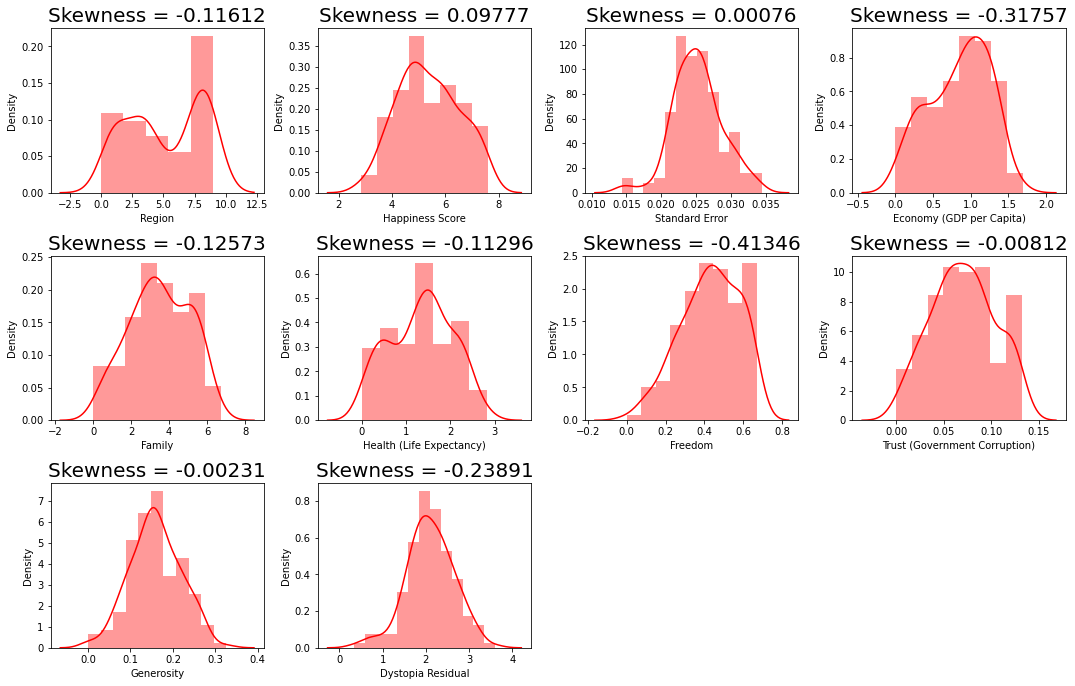

In [39]:
DF=Data

from scipy.stats import yeojohnson

for i in skew_postive_row:
    DF[i]= yeojohnson(DF[i])[0]
for i in skew_negative_row:
    DF[i]= yeojohnson(DF[i])[0]   
    
plt.figure(figsize=(15,25))
for i in range (0, len(collist)):
    plt.subplot(8,4,i+1)
    plt.title(f"Skewness = {round(DF[collist[i]].skew(),5)}",fontsize=20)         
    sns.distplot(DF[collist[i]], color = 'red')
    plt.tight_layout()

In [44]:
Data_1 = Data

In [45]:
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(Data_1))
threshold= 3
Data = Data[(z < 3).all(axis=1)]

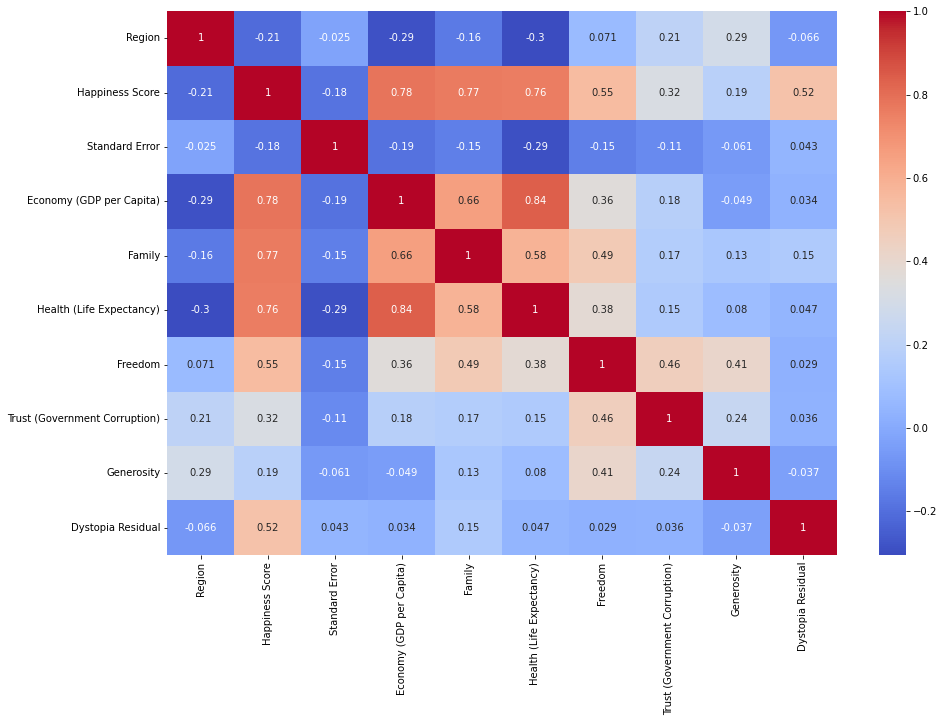

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(Data.corr(),annot = True, cmap = "coolwarm")
plt.show()

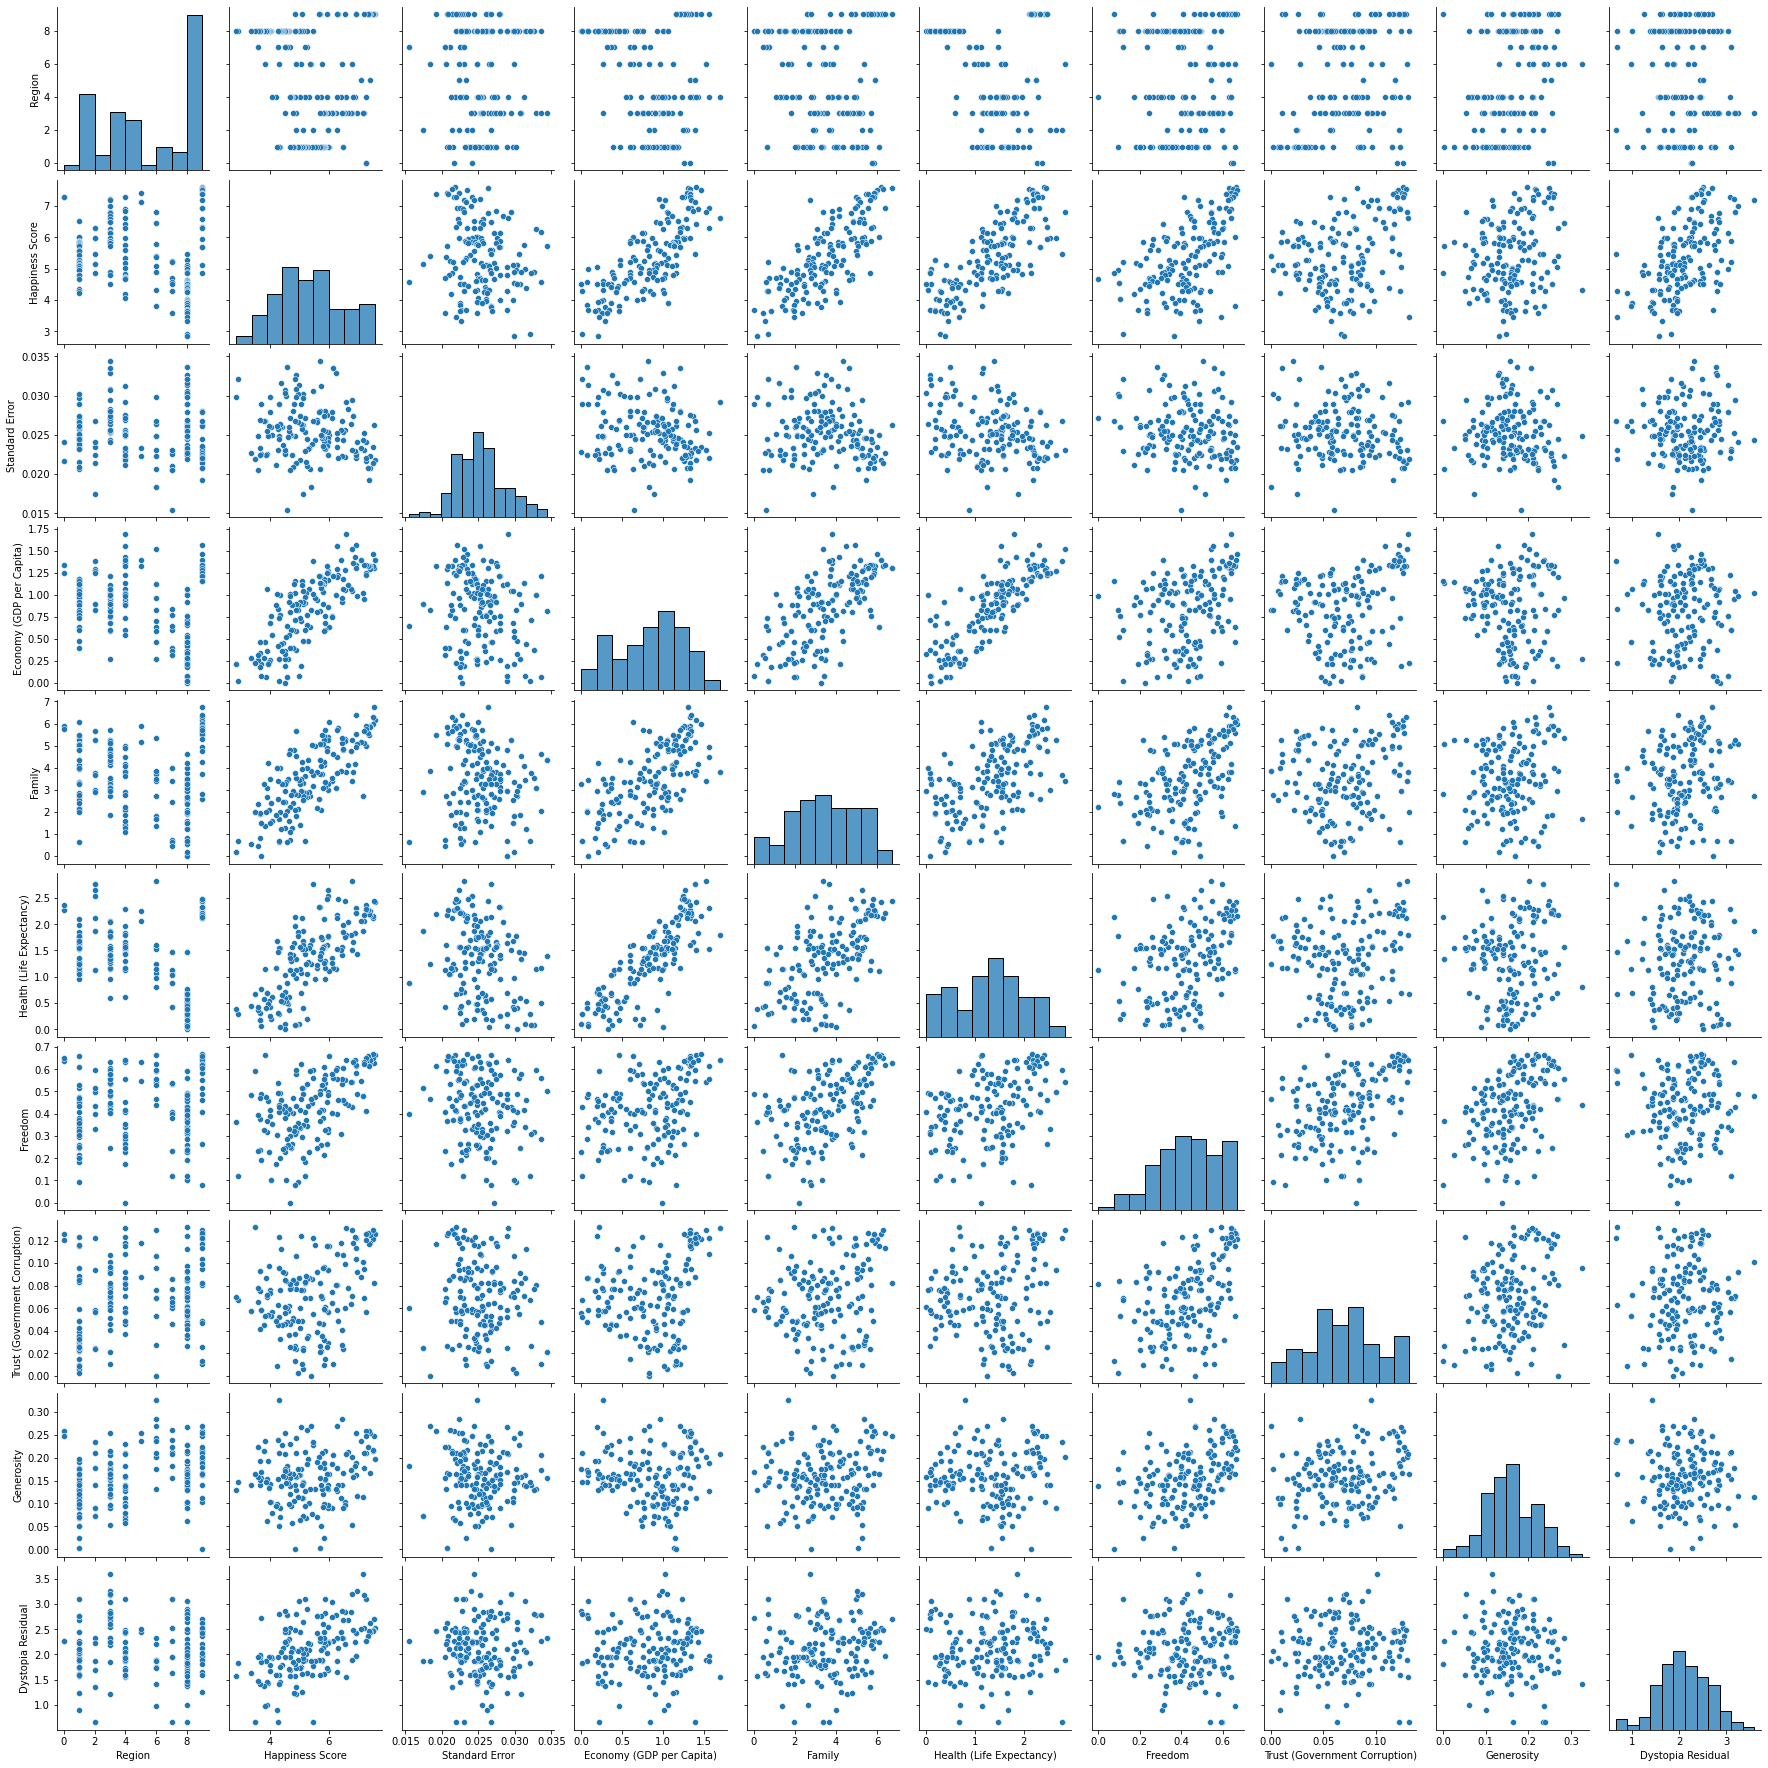

In [48]:
sns.pairplot(Data)

In [49]:
X = Data.drop(["Happiness Score"], axis = 1)
Y = Data["Happiness Score"]

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.25,shuffle=True)

In [78]:
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
scaler = StandardScaler()
RFR = RandomForestRegressor()
RFR.fit(X_train, Y_train)

RandomForestRegressor()

In [79]:
Y_pred = RFR.predict(X_test)

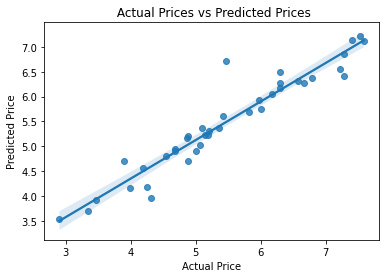

In [80]:
sns.regplot(data=Data, x =Y_test, y = Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [81]:
MAE_RD = mean_absolute_error(Y_test,Y_pred)
MSE_RD = mean_squared_error(Y_test,Y_pred)
RMSE_RD = np.sqrt(MSE_RD)

In [82]:
MAE_RD

0.3031035897435901

In [83]:
MSE_RD

0.1554761325846159

In [84]:
RMSE_RD

0.39430461902520986

In [85]:
X.head()

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,0.021778,1.39651,6.176368,2.415107,0.66557,0.125450,0.196516,2.51738
1,9,0.026310,1.30232,6.738252,2.445434,0.62877,0.082280,0.247438,2.70201
2,9,0.021462,1.32548,6.291468,2.113351,0.64938,0.129075,0.214666,2.49204
3,9,0.023432,1.45900,5.986766,2.159404,0.66973,0.121298,0.216809,2.46531
4,5,0.022302,1.32629,5.902932,2.250168,0.63297,0.117916,0.254018,2.45176


In [86]:
Data.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.021778,1.39651,6.176368,2.415107,0.66557,0.125450,0.196516,2.51738
1,9,7.561,0.026310,1.30232,6.738252,2.445434,0.62877,0.082280,0.247438,2.70201
2,9,7.527,0.021462,1.32548,6.291468,2.113351,0.64938,0.129075,0.214666,2.49204
3,9,7.522,0.023432,1.45900,5.986766,2.159404,0.66973,0.121298,0.216809,2.46531
4,5,7.427,0.022302,1.32629,5.902932,2.250168,0.63297,0.117916,0.254018,2.45176


In [87]:
print('World Happiness Report Prediction:-- ',RFR.predict([[5, 0.022302, 1.32629, 5.902932, 2.250168, 0.63297, 0.117916, 0.254018, 2.45176]]))

World Happiness Report Prediction:--  [7.36835]


In [89]:
print('RandomForestRegressor train score is ',RFR.score(X_train,Y_train))
print('RandomForestRegressor test score is ',RFR.score(X_test,Y_test))

RandomForestRegressor train score is  0.9841155629349736
RandomForestRegressor test score is  0.8952596470509899
